### Tasks
1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [37]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os 
import datetime

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
from scipy import stats
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from pylab import rcParams
rcParams['figure.figsize'] = 20,7
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.2f}'.format

1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [3]:
data = pd.read_csv('HR.csv')

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


3. Рассчитать и визуализировать корреляционную матрицу для переменных

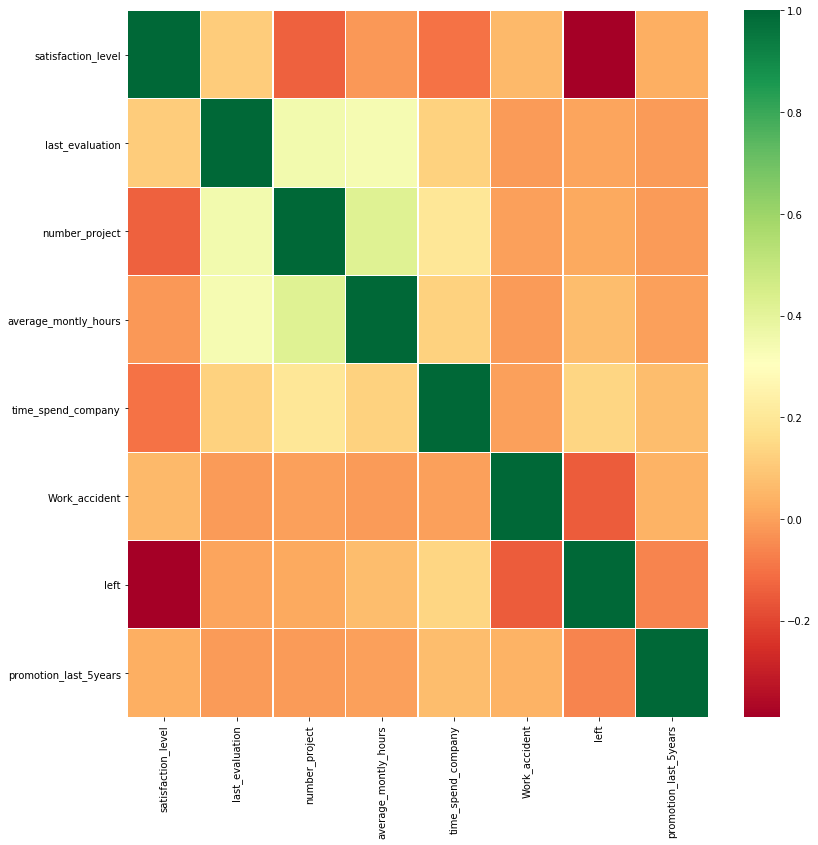

In [7]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

4. Визуализировать несколько взаимосвязей между переменными

Для начала построим точченые графики для всех атрибутов:

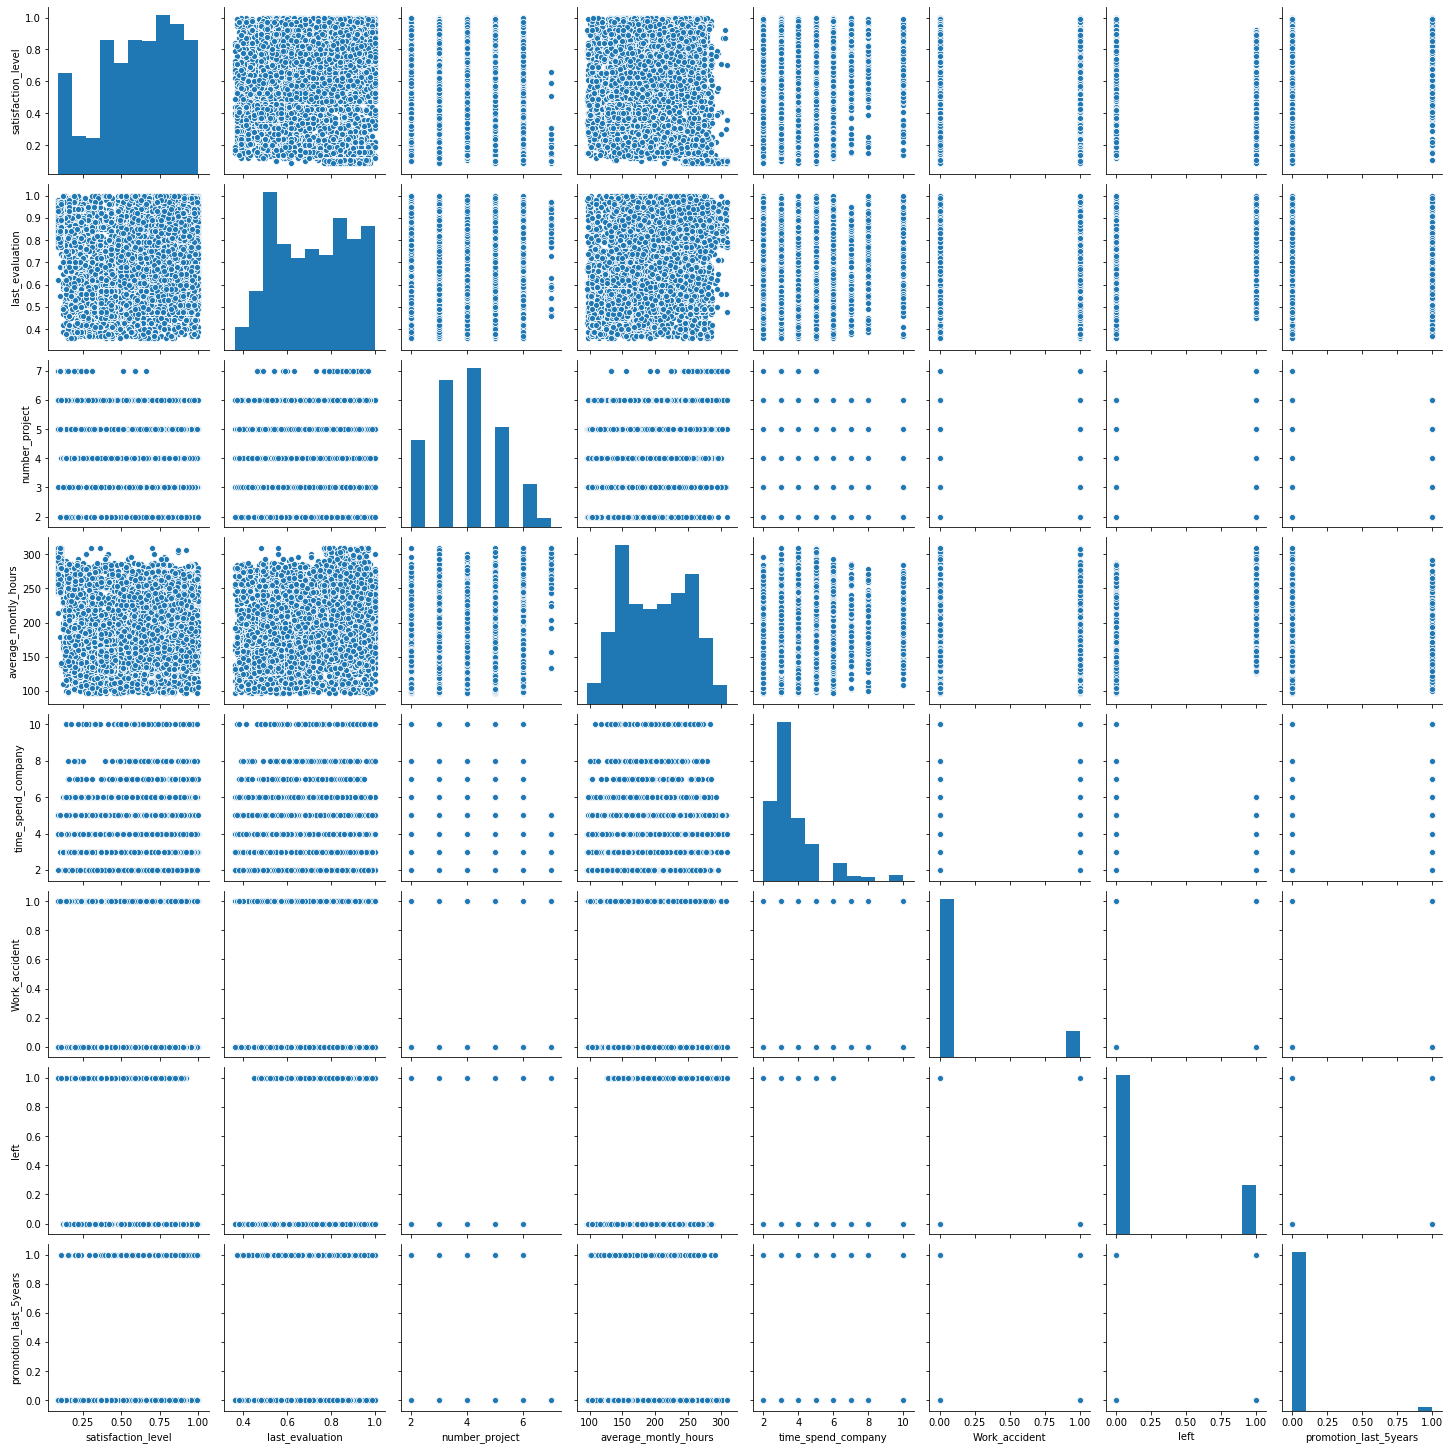

In [39]:
sns.pairplot(data)

In [21]:
def create_scatterplot_between_two_attributes(attr1, attr2):
    
    x_attr = data[attr1]
    y_attr = data[attr2]

    sns.regplot(x = x_attr, y = y_attr, data=data, fit_reg=False)
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.title('Точечный график генеральной совокупности')
    plt.show()

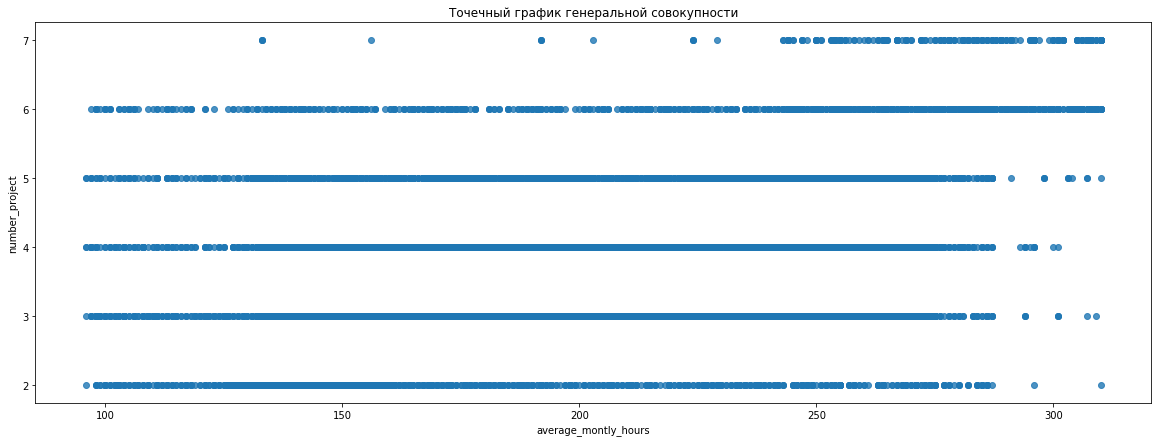

In [26]:
create_scatterplot_between_two_attributes('average_montly_hours', 'number_project')

График выше подтверждает гипотезу о том, что с увеличением проектов растет кол-во часов в месяц.
Посмотрим, как кол-во часов и кол-во проектов влияет на уровень удовлетворенности:

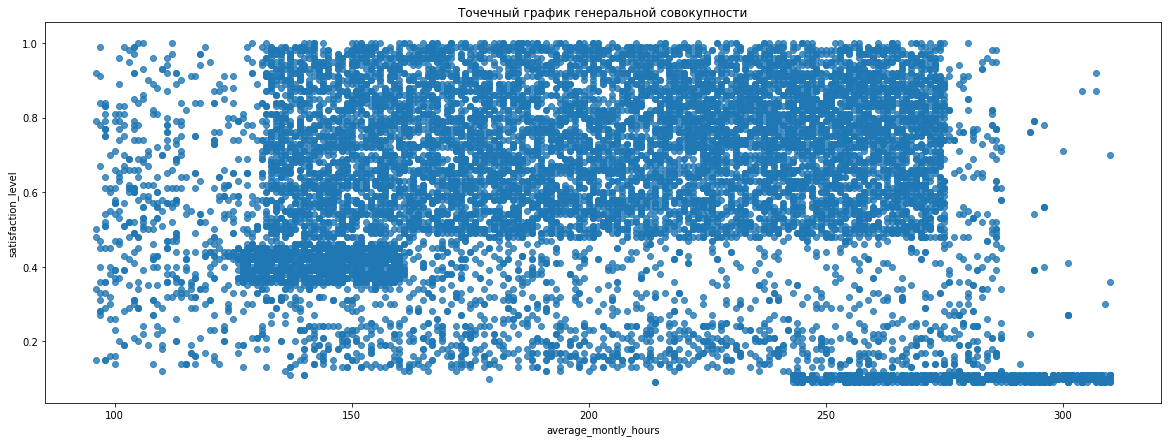

In [32]:
create_scatterplot_between_two_attributes('average_montly_hours', 'satisfaction_level')

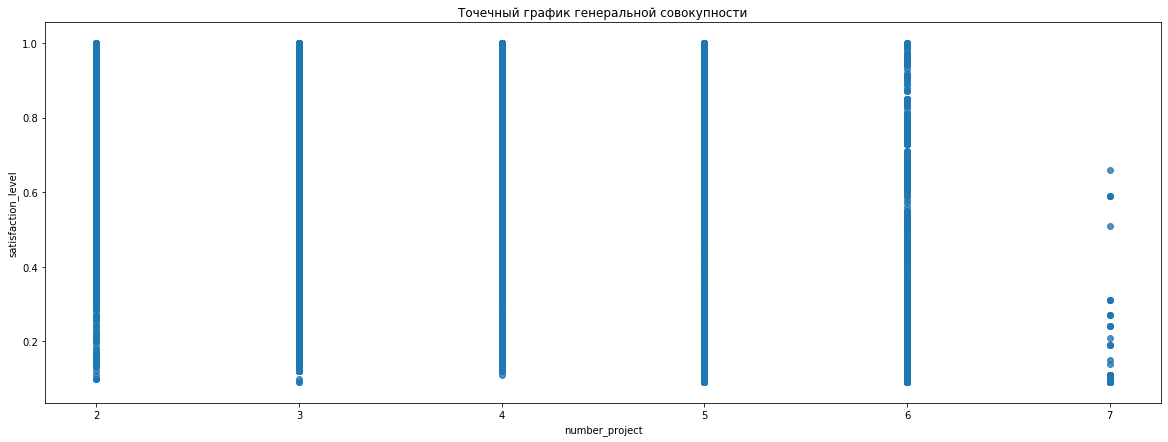

In [28]:
create_scatterplot_between_two_attributes('number_project', 'satisfaction_level')

Видно, что при работе от 12 часов в неделю (240 часов в месяц) уровень удовлетворенности становится критичсеки низким, что скорее всего влияет на рещение покинуть место работы:

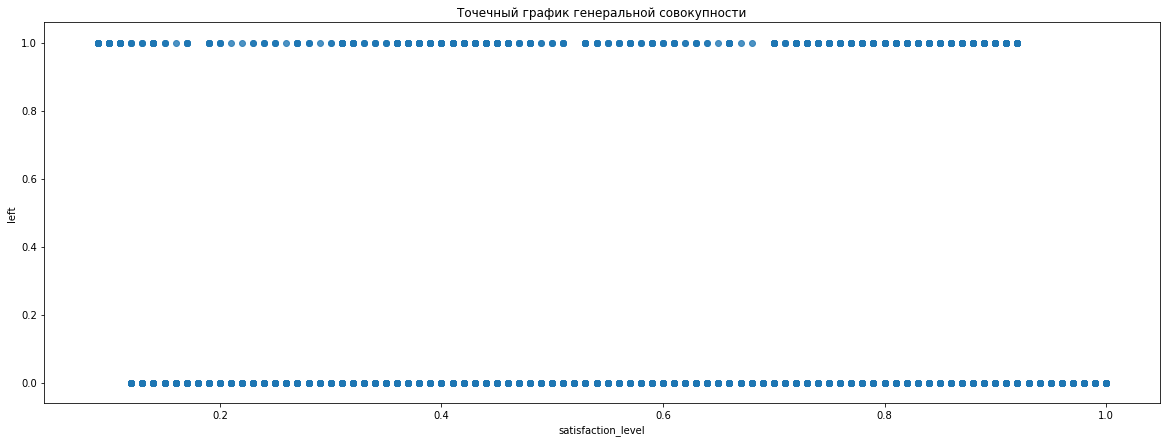

In [29]:
create_scatterplot_between_two_attributes('satisfaction_level', 'left')

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Посмотрим какие значения показывает t-test для разных атрибутов для уволившихся и не уволившихся:

In [55]:
list_of_columns_to_compare = data.columns.tolist()
list_of_columns_to_compare = list(set(list_of_columns_to_compare).difference(set(['left', 'sales', 'salary'])))
for i in list_of_columns_to_compare:
    not_left_workers = data[data['left']==0][i]
    left_workers = data[data['left']==1][i]
    print(i, stats.ttest_ind(not_left_workers, left_workers))

satisfaction_level Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)
average_montly_hours Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)
number_project Ttest_indResult(statistic=-2.9138564358459607, pvalue=0.0035752138709418788)
last_evaluation Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)
Work_accident Ttest_indResult(statistic=19.165804033090176, pvalue=6.613049400453939e-81)
time_spend_company Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)
promotion_last_5years Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)


Из результатов теста видно, что p-value превышает 0.05 только для атрибута last_evaluation
Можно сделать вывод о том, что группы почти по всем показатели (satisfaction_level, average_montly_hours, number_project, Work_accident, time_spend_company, promotion_last_5years) статистически не отличаются (логично, т.к. эти показатели напрямую влияют на решение остаться или уйти) 

Только для показателя last_evaluation группы статистически отличаются. Также логично - увольняются не только работники с плохими оценками, но также и с хорошими.


6. Рассчитать сколько работников работает в каждом департаменте

In [58]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

7. Показать распределение сотрудников по зарплатам

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


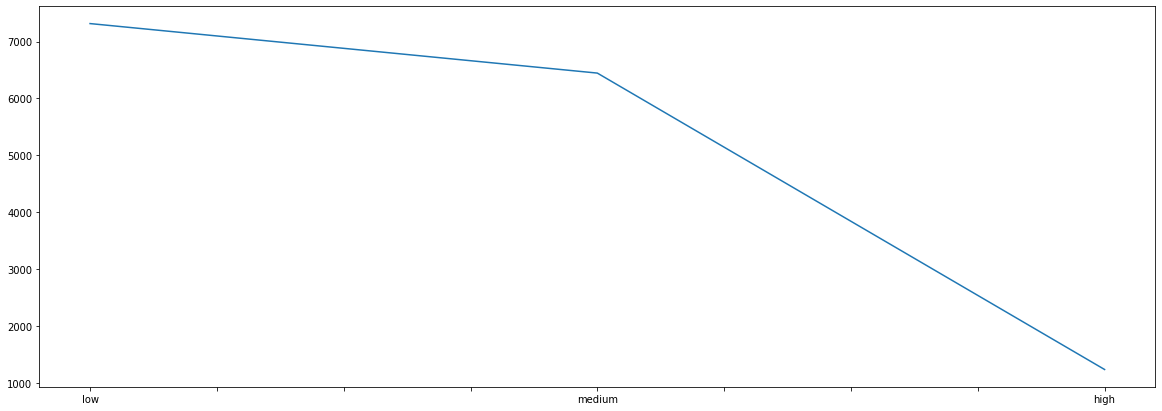

In [61]:
print(data.salary.value_counts())
data.salary.value_counts().plot()

8. Показать распределение сотрудников по зарплатам совместно с департаментами

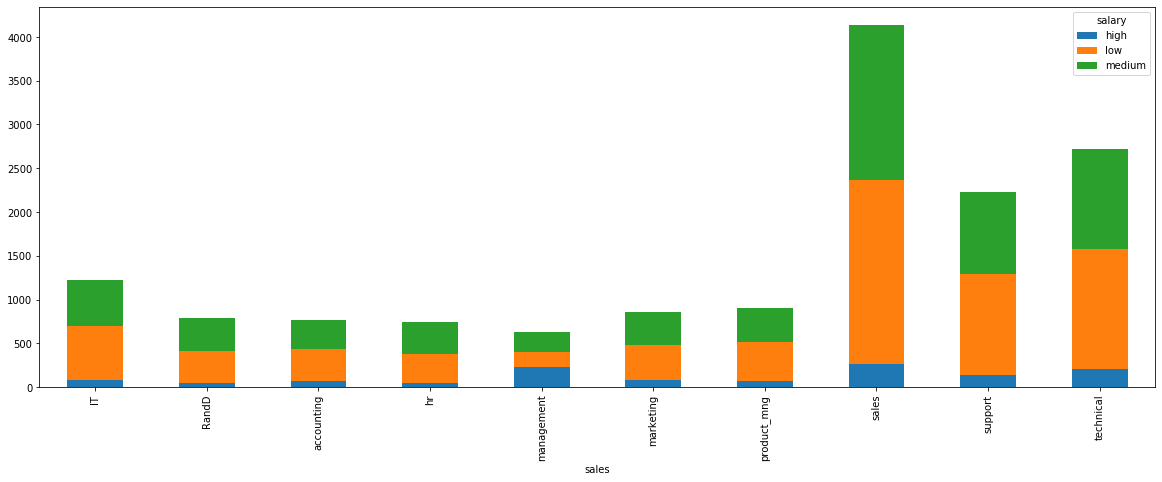

In [76]:
data.groupby(['sales', 'salary']).size().unstack().plot(kind='bar', stacked=True)

9. Сколько сотрудников покинули компанию

In [79]:
print(f' Из {len(data)} сотрудников, компанию покинули {len(data[data.left==1])} \
({round(100*len(data[data.left==1])/len(data))}%)')

 Из 14999 сотрудников, компанию покинули 3571 (24%)


10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Как мы видели ранее, наиболее сильно влияет на урвоень удовлетворенности (а, соответственно, и на решение покинуть компанию) кол-во проектов и, как следствие, кол-во часов в месяц.
Проверим нашу гипотезу и выделим наиболее важные атрибуты с помощью Random Forest.

In [109]:
# Приведем нечисловые атрибуты в числовой формат

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['salary_num'] = le.fit_transform(data.salary)
data['sales_num'] = le.fit_transform(data.sales)

In [107]:
output_y = data.left
input_x = data[list(set(data.columns.tolist()).difference(set(['left', 'salary', 'sales'])))]

X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

model score: 0.991, roc auc (alternative score): 0.9827708353588792


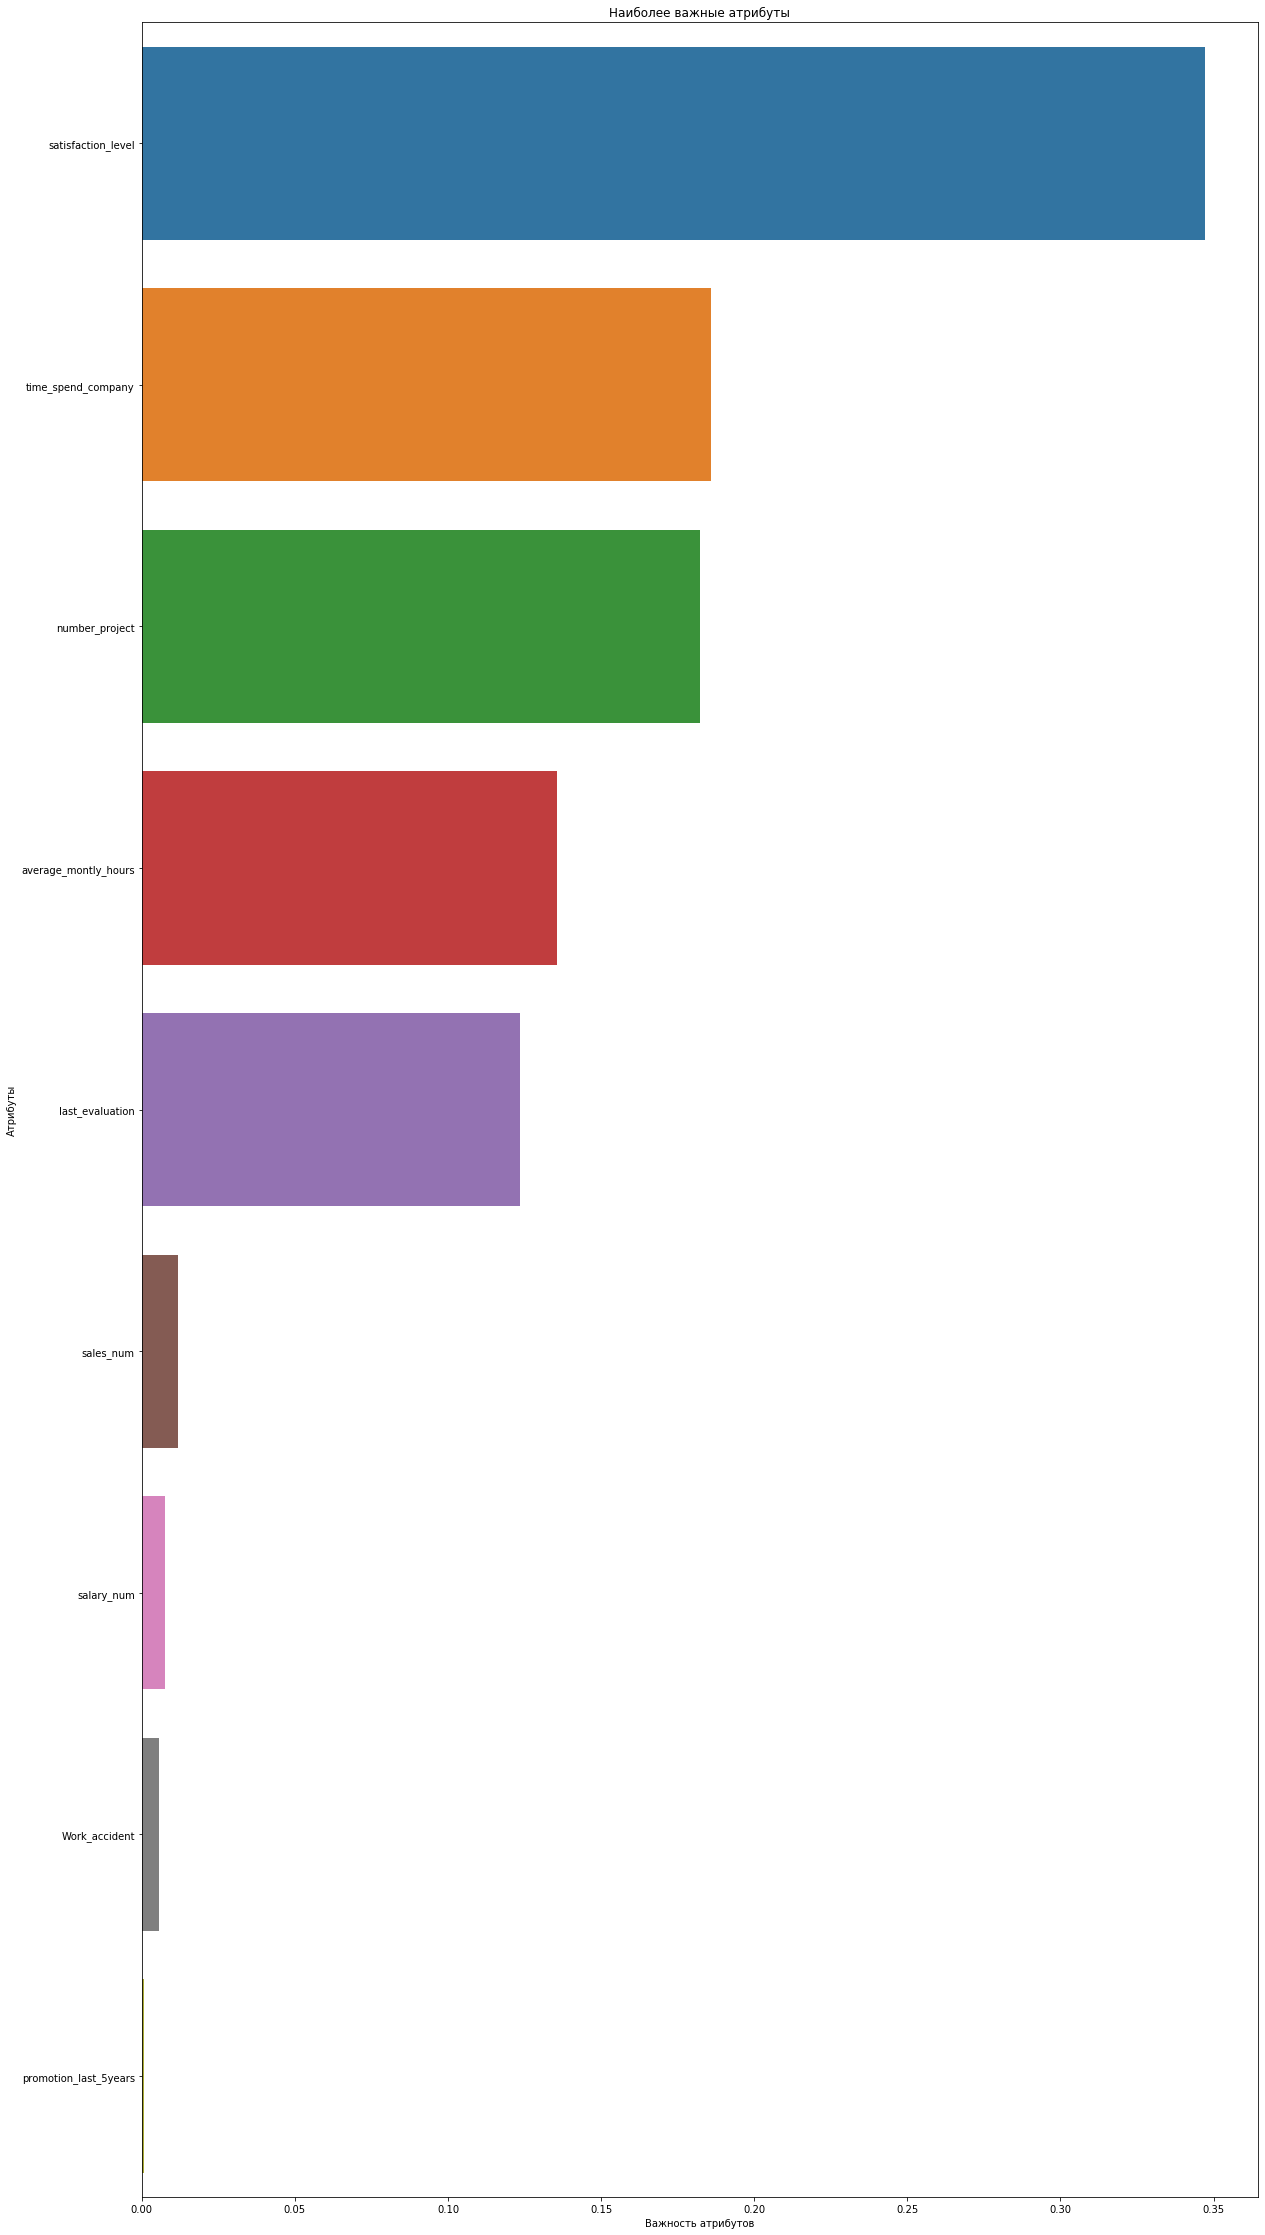

In [110]:
model=RandomForestClassifier(n_estimators=300)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'model score: {model.score(X_test, y_test)}, roc auc (alternative score): {roc_auc}')
    
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(20, 40))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Наша модель получилась достаточно точной (model score: 0.991, roc auc (alternative score): 0.9827708353588792).
Самый важный атрибут, как и ожидалось, satisfaction_level
Однако, наша гипотеза дополнилась еще одним атрибутом - время работы в компании! Построим график:

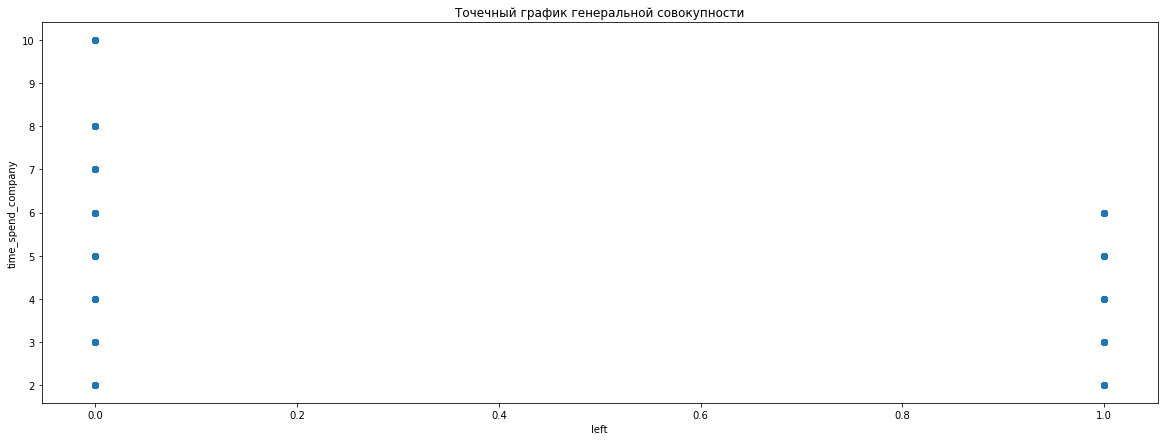

In [111]:
create_scatterplot_between_two_attributes('left', 'time_spend_company')

Действительно, чем больше человек проработал в компании, тем меньше вероятность его увольнения.
Таким образом, наши данные показывают, что увольнение сотрудника зависит от времени работы в компании и от уровня удовлетворенности работы в компании, который в свою очередь во многом зависит от кол-ва работы (кол-ва проектов и кол-ва часов).